<a href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/Lab_1_Data_generation_and_visualization_for_regression_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data generation and visualization for regression and classification

**Goal**: generate synthetic data for both regression and classification tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data generation: regression, linear
============================

Model is $y=wx + ɛ$ with $\varepsilon \sim \mathcal{N}(0, \sigma)$

In [2]:
def datagen(d, points, m, M, w, sigma):
    """
    Parameters
    ----------
    d : int
        Dimension of each data sample
    points : int
        Number of points to be generated
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    w : float array of dim 1 x d
        Vector of weights of the linear model
    sigma : float
        Standard deviation of the noise eps
    """
    X = np.zeros((points,d))
    for i in range(points):
        X[i,:] = np.random.uniform(m,M,d)
    eps = np.random.normal(0,sigma,points)
    y = np.dot(X,w) + eps 
    return X,y

In [3]:
# usage example 
d = 1
w = np.random.normal(0,1,d)
sigma = 1
points = 100
m = -10
M = 10

X, y = datagen(d,points,m,M,w,sigma)

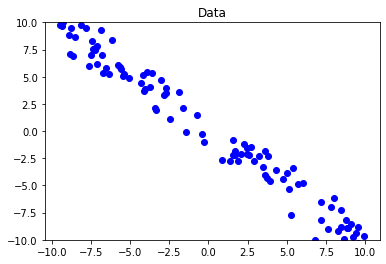

In [4]:
# plotting the generated dataset
fig, ax =plt.subplots()
ax.scatter(X, y, c='b')
ax.set_title('Data')
plt.ylim([m, M])

fig.show()

1. Add different level of noise (how do you get noiseless data?) and interpolating line to the plot

Data generation: classification
=========================

We want to generate  2D data for classification  in the form of 2 (or more) gaussian clouds with specific means and variances.

In [5]:
def mixGauss(means, sigmas, n):
    """
    Parameters
    ----------
    means : matrix/list of float of dim n_classes x dim_data (d)
        Means of the Gaussian functions
    sigmas : array/list of float of dim n_classes
        Standard deviation of the Gaussian functions
    n : int
        Number of points for each class
    """
    means = np.array(means)
    sigmas = np.array(sigmas)

    d = np.shape(means)[1] # the means matrix is of dim m x 2
    num_classes = sigmas.size # the number of variances is the number of classes
    
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    for idx, sigma in enumerate(sigmas):
        # generates n points around means[idx] with cov and fills the array data idx=1...num_classes 
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2,size=n)   
        labels[idx * n:(idx + 1) * n] = idx 
        
    if(num_classes == 2):
        labels[labels==0] = -1

    return data, labels

In [6]:
# usage example 
means = [[3,0],[0,6]]
sigmas = [0.9,0.9]
n = 100

X, labels = mixGauss(means, sigmas, n)

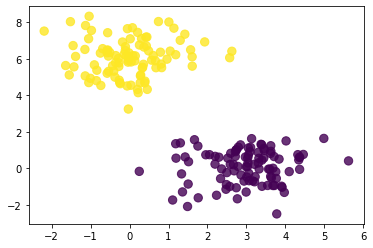

In [7]:
# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=labels, alpha=0.8)
fig.show()

Label Noise
==========

Add some noise to the dataset by randomly flipping some labels

In [8]:
def labelsnoise(perc, labels):
    """
    Parameters
    ----------
    perc : float 
        Percentage of labels to be flipped
    labels: array of int of dim n_classes
        Array containing labels idxs
    """
    points = np.shape(labels)[0]
    noisylabels = np.copy(np.squeeze(labels))
    n_flips = int(np.floor(points * perc / 100)) # floor: nearest integer by defect
    idx_to_flip = np.random.choice(points, size=n_flips, replace=False) # replace is false since the same index cannot be chosen twice
    noisylabels[idx_to_flip] = -noisylabels[idx_to_flip] # for binary this turns -1 into 1 and viceversa
    return noisylabels


In [9]:
# usage example 
noisylabels = labelsnoise(50, labels)
noisylabels

array([ 1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
        1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
        1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1

Alternative for binary classification: linear
==================================

Generate a dataset for classification in which points are linearly separated, i.e. there exists a line $y = ax + b$ that separes the classes

In [10]:
def binary(a, b, points, m, M, d):
    """
    Parameters
    ----------
    a : float
        Angular coefficient of the separating line
    b : float
        Intercept of the separating line
    points : int
        Number of points to be generated
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    d : int
        Dimension of each data sample
    """
    X = np.zeros((points,d))
    labels = np.zeros(points)
    
    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)
    
    labels[X[:,1]-a*X[:,0]-b>0] = 1
    labels[X[:,1]-a*X[:,0]-b<0] = -1
    return X,labels    

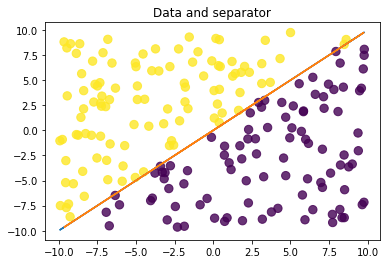

In [11]:
# usage example
a=1
b=0
d=2
points=200
m=-10
M=10

X,labels=binary(a,b,points,m,M,d)

# plotting the generated dataset
fig,ax=plt.subplots()
ax.scatter(X[:,0],X[:,1],s=70, c=labels, alpha=0.8)
ax.plot(X,a*X+b)
ax.set_title('Data and separator')
plt.show()

Alternative for binary classification: non-linear (from gg)
==============================================

Add some noise to the dataset by randomly flipping some labels;

Generate Binary classification datasets which are separated by non-linear functions.

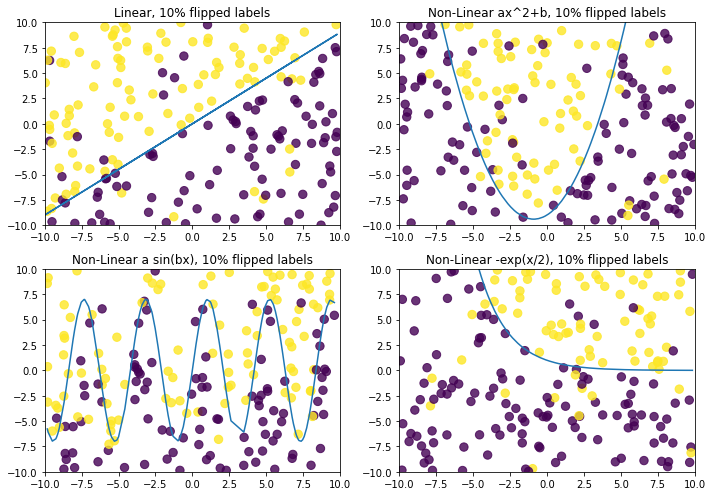

In [12]:
def flipLabels(Y, perc):
    """
    Parameters
    ----------
    perc : float 
        Percentage of labels to be flipped
    labels: array of int of dim n_classes
        Array containing labels idxs
    """
    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy




n = 200 # number of points per class
D = 2 # dimension of the points

fig = plt.figure(figsize=(10,7)) 
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)


# linear case
m = 0.9
q = 0

# bounds (assume they are the same for all dimensions)
low_D = -10
high_D = 10

X = np.zeros((n, D))
Y = np.zeros(n)

# sampling of the X
for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)
    
# assigning the labels depending on the position of the sample with respect to the linear separator
Y[X[:,1] - (X[:,0] * m + q) > 0] = 1 
Y[Y==0] = -1

# add some noise
Yn = flipLabels(Y, 10)

# plot the samples and the separator
ax0.set_title("Linear, 10% flipped labels")
ax0.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax0.plot(X[:,0], X[:,0] * m + q)
ax0.set_xlim((low_D, high_D))
ax0.set_ylim((low_D, high_D))


# non-linear separators case 1

a = 0.5
b = 0.9
c = -9

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)
    
Y[X[:,1] - (X[:,0]**2 * a + X[:,0]*b + c) > 0] = 1 
Y[Y==0] = -1

Yn = flipLabels(Y, 10)

ax1.set_title("Non-Linear ax^2+b, 10% flipped labels")
ax1.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax1.plot(np.sort(X[:,0]), np.sort(X[:,0])**2 * a + np.sort(X[:,0])*b + c)
ax1.set_xlim((low_D, high_D))
ax1.set_ylim((low_D, high_D))

# non-linear case 2

alpha = 7
beta = 1.5

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)
    
Y[X[:,1] - alpha*np.sin(beta*X[:,0]) > 0] = 1 
Y[Y==0] = -1

Yn = flipLabels(Y, 10)

ax2.set_title("Non-Linear a sin(bx), 10% flipped labels")
ax2.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax2.plot(np.sort(X[:,0]), alpha*np.sin(beta*np.sort(X[:,0])))
ax2.set_xlim((low_D, high_D))
ax2.set_ylim((low_D, high_D))

# non-linear case 3

alpha = 7
beta = 0.5

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)
    
Y[X[:,1] - np.exp(-X[:,0]/2) > 0] = 1 
Y[Y==0] = -1

Yn = flipLabels(Y, 10)

ax3.set_title("Non-Linear -exp(x/2), 10% flipped labels")
ax3.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax3.plot(np.sort(X[:,0]), np.exp(-np.sort(X[:,0]/2)))
ax3.set_xlim((low_D, high_D))
ax3.set_ylim((low_D, high_D))
             
plt.tight_layout()

More than 2 Gaussians
===================

Generate  2D data for (binary) classification  in the form of more than $2$ gaussian clouds with specific means and variances.

In [ ]:
# generate two datasets: binary (2 classes) and non binary (4 classes) 
# classification with more than two gaussians


In [ ]:
# plot the two generated datasets
fig = plt.figure(figsize=(10,7)) 
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Dataset 1 - 4 classes")
# ax0.scatter() 

ax1.set_title("Dataset 2 - 2 classes")
# ax1.scatter()

plt.tight_layout()

Extend the flipping to multiple gaussians